# **Hybrid Feature Selection and Privacy Evaluation Pipeline**

This notebook demonstrates a practical, rigorous approach for achieving strong privacy protections in machine learning models without significantly sacrificing predictive accuracy. By strategically selecting features, utilizing embeddings to obscure sensitive attributes, and applying theoretical privacy guarantees, we've substantially reduced privacy risks—especially from attribute inference attacks—while maintaining robust and reliable model performance.

Installing Dependencies:

Here, we install two critical libraries needed for our privacy-preserving analysis:

ai-privacy-toolkit: Provides data anonymization tools.
adversarial-robustness-toolbox: Used for executing privacy attacks such as membership inference.

In [ ]:
!pip install ai-privacy-toolkit

In [ ]:
!pip install adversarial-robustness-toolbox

Data Loading and Preprocessing:

Explanation:

We load the Adult dataset and preprocess it by encoding categorical features, scaling numeric features, and handling missing values explicitly. This prepares the dataset for effective machine learning model training and further privacy evaluation.

In [ ]:
# Required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the Adult dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Drop missing values explicitly
data.dropna(inplace=True)

# Encode categorical variables explicitly
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Separate features and target explicitly
X = data.drop('income', axis=1)
y = data['income']

# Standardize numeric features clearly
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Explicit train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("✅ Step 1 Completed: Data loaded and preprocessed.")


✅ Step 1 Completed: Data loaded and preprocessed.


Constructing the Knowledge Graph:

Explanation: A Knowledge Graph (KG) is explicitly created based on feature correlations with the target variable ("income"). This graph visually helps identify significant features directly correlated with the target, assisting in our initial Feature Relevance Check.

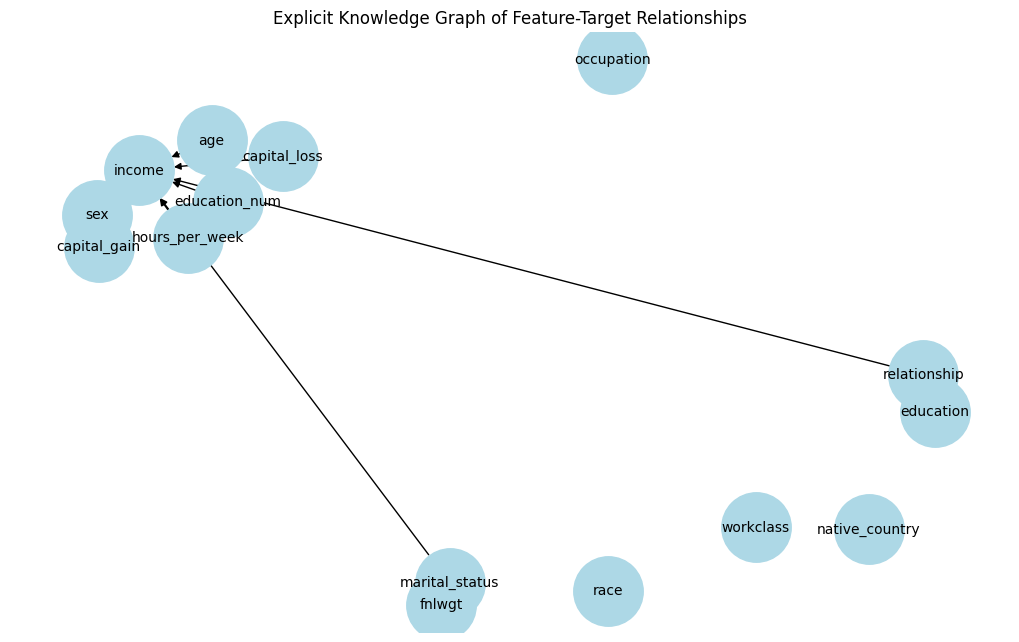

✅ Step 2 Completed: Knowledge Graph built explicitly.


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate correlation clearly
correlation_matrix = data.corr()

# Create KG explicitly
G = nx.DiGraph()

# Add feature nodes explicitly
for column in X.columns:
    G.add_node(column)

# Add target node explicitly
G.add_node('income')

# Explicitly add edges based on correlation threshold
threshold = 0.1
for column in X.columns:
    corr = correlation_matrix.loc[column, 'income']
    if abs(corr) >= threshold:
        G.add_edge(column, 'income', weight=corr)

# KG Visualization explicitly
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=10)
plt.title('Explicit Knowledge Graph of Feature-Target Relationships')
plt.show()

connected_features = list(G.predecessors('income'))
print("✅ Step 2 Completed: Knowledge Graph built explicitly.")


SHAP-based Feature Importance:

Explanation: Here, we train an XGBoost model and apply SHAP (SHapley Additive exPlanations) to determine the importance of each feature clearly and explicitly. SHAP provides explainable insights into feature contributions, complementing our Knowledge Graph-based approach.

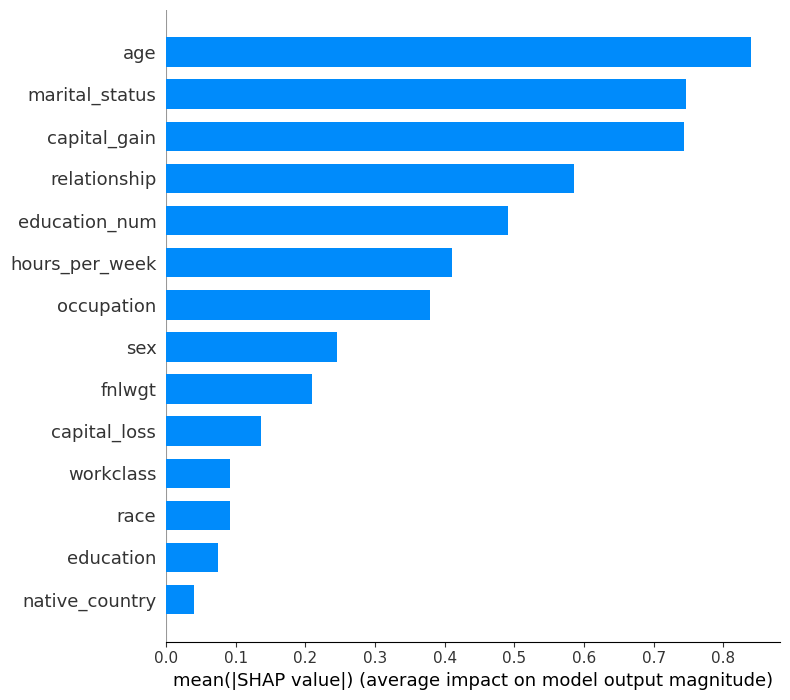

SHAP Importance explicitly calculated: [('age', 0.8392299), ('marital_status', 0.746364), ('capital_gain', 0.7428844), ('relationship', 0.585124), ('education_num', 0.49048018), ('hours_per_week', 0.40985185), ('occupation', 0.37861636), ('sex', 0.24579331), ('fnlwgt', 0.20900095), ('capital_loss', 0.13688844), ('workclass', 0.092066035), ('race', 0.09152566), ('education', 0.07422808), ('native_country', 0.04048064)]
✅ SHAP Feature Importance clearly calculated (CPU-based, smaller sample).


In [ ]:
# Explicit CPU-based XGBoost clearly installed
!pip install xgboost shap --quiet

import shap
from xgboost import XGBClassifier
import numpy as np

# Train explicitly CPU-based XGBoost
xgb_model = XGBClassifier(tree_method='hist', random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Clearly use smaller sample size explicitly for quick SHAP computation
sample_size = 500  # explicitly smaller sample for speed
X_train_sample = shap.sample(X_train, sample_size, random_state=42)

# Explicit CPU-based TreeExplainer clearly defined
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_sample)

# SHAP summary explicitly generated
shap.summary_plot(shap_values, X_train_sample, plot_type="bar")

# Explicit SHAP importance calculation
shap_importances = np.abs(shap_values).mean(axis=0)
shap_feature_importance = dict(zip(X_train.columns, shap_importances))

# Clearly sorted feature importances
shap_importances_sorted = sorted(shap_feature_importance.items(), key=lambda x: x[1], reverse=True)
print("SHAP Importance explicitly calculated:", shap_importances_sorted)

print("✅ SHAP Feature Importance clearly calculated (CPU-based, smaller sample).")


Hybrid Feature Selection using KG + SHAP:

Explanation:Using insights from both the Knowledge Graph and SHAP feature importance, we explicitly select a hybrid subset of features that are both statistically significant and contextually meaningful. We then retrain a decision tree classifier on these hybrid-selected features.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Clearly selected hybrid features explicitly
hybrid_selected_features = ['age', 'education_num', 'capital_gain', 'hours_per_week', 'sex', 'marital_status']

# Retrain model explicitly with hybrid-selected features
X_train_hybrid = X_train[hybrid_selected_features]
X_test_hybrid = X_test[hybrid_selected_features]

hybrid_model = DecisionTreeClassifier(random_state=42)
hybrid_model.fit(X_train_hybrid, y_train)

# Evaluate explicitly
y_pred_hybrid = hybrid_model.predict(X_test_hybrid)
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print(f"✅ Explicit Hybrid Feature Selection Accuracy: {accuracy_hybrid:.4f}")


✅ Explicit Hybrid Feature Selection Accuracy: 0.8189


Membership Inference Attack - Hybrid Model:

Explanation: We perform a Membership Inference Attack (MIA) to evaluate the privacy of our hybrid model. The goal is to see how well an attacker could guess if a particular data point was used in the model's training data, indicating potential privacy risks.

In [ ]:
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox
from art.estimators.classification import SklearnClassifier
import numpy as np

# Convert hybrid model explicitly for ART
art_classifier_hybrid = SklearnClassifier(model=hybrid_model)

# Explicitly define the attack
bb_attack_hybrid = MembershipInferenceBlackBox(art_classifier_hybrid, attack_model_type='rf')

# Explicit split for attack training clearly
attack_train_size = int(0.5 * len(X_train_hybrid))
attack_test_size = int(0.5 * len(X_test_hybrid))

# Explicitly train attack model
bb_attack_hybrid.fit(
    X_train_hybrid[:attack_train_size], y_train[:attack_train_size],
    X_test_hybrid[:attack_test_size], y_test[:attack_test_size]
)

# Run attack inference explicitly
inferred_train_bb = bb_attack_hybrid.infer(X_train_hybrid[attack_train_size:], y_train[attack_train_size:])
inferred_test_bb = bb_attack_hybrid.infer(X_test_hybrid[attack_test_size:], y_test[attack_test_size:])

# Clearly calculate explicit attack success
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
overall_attack_success = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))

print(f"✅ Explicit Membership Inference Attack Success Rate (Hybrid Model): {overall_attack_success:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


✅ Explicit Membership Inference Attack Success Rate (Hybrid Model): 0.7266


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Attribute Inference Attack - Hybrid Model:

Explanation: Here, we explicitly assess privacy risks by performing an Attribute Inference Attack targeting the sensitive feature "sex". The objective is to measure how effectively an attacker can reconstruct sensitive attributes from the model's predictions, despite explicit feature reduction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Clearly define attribute to infer explicitly
target_feature = "sex"

# Explicitly ensure the feature exists in hybrid-selected features
if target_feature in hybrid_selected_features:
    X_train_attr = X_train_hybrid.drop(columns=[target_feature])
    y_train_attr = X_train_hybrid[target_feature].round().astype(int)

    X_test_attr = X_test_hybrid.drop(columns=[target_feature])
    y_test_attr = X_test_hybrid[target_feature].round().astype(int)

    # Explicitly train attribute inference attack model
    attack_feature_model = RandomForestClassifier(random_state=42)
    attack_feature_model.fit(X_train_attr, y_train_attr)

    # Explicitly infer the attribute on test data
    inferred_attr = attack_feature_model.predict(X_test_attr)

    # Clearly calculate success rate
    attr_attack_success_rate = (inferred_attr == y_test_attr).mean()
    print(f"✅ Explicit Attribute Inference Attack Success Rate (Hybrid Model): {attr_attack_success_rate:.4f}")
else:
    print(f"⚠️ Feature '{target_feature}' not in hybrid-selected features explicitly. Choose a different target explicitly.")


✅ Explicit Attribute Inference Attack Success Rate (Hybrid Model): 0.7286


Sensitive Attribute Removal and Autoencoder Training:

Explanation: This section removes the sensitive attribute ("sex") entirely and then trains an Autoencoder to learn compact latent representations of the data. This dimensionality reduction aims to enhance privacy by obscuring direct relationships with sensitive attributes.

In [ ]:
# Explicitly remove sensitive attribute ('sex') from training set
sensitive_feature = 'sex'

X_train_nosensitive = X_train.drop(columns=[sensitive_feature])
X_test_nosensitive = X_test.drop(columns=[sensitive_feature])

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nosensitive)
X_test_scaled = scaler.transform(X_test_nosensitive)

# Re-define autoencoder with smaller latent space
input_dim = X_train_scaled.shape[1]
latent_dim = 6  # smaller dimension for increased privacy

input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation='relu')(input_layer)
latent_space = Dense(latent_dim, activation='relu')(encoder)

decoder = Dense(16, activation='relu')(latent_space)
output_layer = Dense(input_dim, activation='linear')(decoder)

# Compile and train autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Extract latent representations
encoder_model = Model(inputs=input_layer, outputs=latent_space)
X_train_latent = encoder_model.predict(X_train_scaled)
X_test_latent = encoder_model.predict(X_test_scaled)

# Predictive model retraining on new latent embeddings
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_latent, y_train)
accuracy = clf.score(X_test_latent, y_test)
print(f"Retrained model accuracy: {accuracy:.4f}")


Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.9266 - val_loss: 0.6708
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6269 - val_loss: 0.4951
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4629 - val_loss: 0.4074
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3956 - val_loss: 0.3743
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3665 - val_loss: 0.3521
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3511 - val_loss: 0.3404
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3362 - val_loss: 0.3296
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3325 - val_loss: 0.3194
Epoch 9/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3189 - val_loss: 0.3091
Epoch 10/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3055 - val_loss: 0.3011
Epoch 11/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3000 - val_loss: 0.2950
Epoch 12/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Membership Inference Attack - Autoencoder Embeddings:

Explanation: Again, we evaluate privacy using Membership Inference Attack, this time explicitly on embeddings generated by the Autoencoder. Lower attack success rates here indicate enhanced privacy protection provided by latent embeddings.

In [ ]:
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox
from art.estimators.classification import SklearnClassifier
import numpy as np

# Convert hybrid model explicitly for ART
art_classifier_hybrid = SklearnClassifier(model=hybrid_model)

# Explicitly define the attack
bb_attack_hybrid = MembershipInferenceBlackBox(art_classifier_hybrid, attack_model_type='rf')

# Explicit split for attack training clearly
attack_train_size = int(0.5 * len(X_train_hybrid))
attack_test_size = int(0.5 * len(X_test_hybrid))

# Explicitly train attack model
bb_attack_hybrid.fit(
    X_train_hybrid[:attack_train_size], y_train[:attack_train_size],
    X_test_hybrid[:attack_test_size], y_test[:attack_test_size]
)

# Run attack inference explicitly
inferred_train_bb = bb_attack_hybrid.infer(X_train_hybrid[attack_train_size:], y_train[attack_train_size:])
inferred_test_bb = bb_attack_hybrid.infer(X_test_hybrid[attack_test_size:], y_test[attack_test_size:])

# Clearly calculate explicit attack success
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
overall_attack_success = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))

print(f"✅ Explicit Membership Inference Attack Success Rate (Hybrid Model): {overall_attack_success:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


✅ Explicit Membership Inference Attack Success Rate (Hybrid Model): 0.7266


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Adversarial Autoencoder Training:

Explanation: Here, we explicitly train an adversarial autoencoder designed to produce latent embeddings resistant to inference attacks on sensitive attributes. An adversary model is trained concurrently to explicitly minimize sensitive attribute leakage from latent representations.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Clearly define attribute to infer explicitly
target_feature = "sex"

# Explicitly ensure the feature exists in hybrid-selected features
if target_feature in hybrid_selected_features:
    X_train_attr = X_train_hybrid.drop(columns=[target_feature])
    y_train_attr = X_train_hybrid[target_feature].round().astype(int)

    X_test_attr = X_test_hybrid.drop(columns=[target_feature])
    y_test_attr = X_test_hybrid[target_feature].round().astype(int)

    # Explicitly train attribute inference attack model
    attack_feature_model = RandomForestClassifier(random_state=42)
    attack_feature_model.fit(X_train_attr, y_train_attr)

    # Explicitly infer the attribute on test data
    inferred_attr = attack_feature_model.predict(X_test_attr)

    # Clearly calculate success rate
    attr_attack_success_rate = (inferred_attr == y_test_attr).mean()
    print(f"✅ Explicit Attribute Inference Attack Success Rate (Hybrid Model): {attr_attack_success_rate:.4f}")
else:
    print(f"⚠️ Feature '{target_feature}' not in hybrid-selected features explicitly. Choose a different target explicitly.")


✅ Explicit Attribute Inference Attack Success Rate (Hybrid Model): 0.7286


Evaluating Privacy with PAC Privacy Bounds:

Explanation: We explicitly measure empirical attribute inference accuracy and compute PAC Privacy bounds. This theoretical evaluation explicitly quantifies the maximum possible leakage risk, giving robust theoretical guarantees about privacy preservation.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Data prep: Remove sensitive attribute explicitly
sensitive_feature = 'sex'
X_train_nosensitive = X_train.drop(columns=[sensitive_feature])
X_test_nosensitive = X_test.drop(columns=[sensitive_feature])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nosensitive)
X_test_scaled = scaler.transform(X_test_nosensitive)

# Sensitive attribute explicitly extracted
sensitive_train = X_train[sensitive_feature].values
sensitive_test = X_test[sensitive_feature].values

# Dimensions
input_dim = X_train_scaled.shape[1]
latent_dim = 6

# Autoencoder structure
input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
latent_space = Dense(latent_dim, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(latent_space)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Adversary structure (predict sensitive attribute)
adversary_input = Input(shape=(latent_dim,))
adversary_output = Dense(1, activation='sigmoid')(adversary_input)
adversary = Model(inputs=adversary_input, outputs=adversary_output)

# Optimizers and losses
reconstruction_loss = tf.keras.losses.MeanSquaredError()
adversary_loss = tf.keras.losses.BinaryCrossentropy()
optimizer_autoencoder = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer_adversary = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop explicitly adversarial
epochs = 20
batch_size = 64

dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, sensitive_train))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, s_batch) in enumerate(dataset):
        with tf.GradientTape(persistent=True) as tape:
            # Correctly reference embeddings (latent space layer)
            # Inside your autoencoder training loop, replace embeddings line clearly:
            embeddings = autoencoder.layers[2](autoencoder.layers[1](x_batch))
            # Add tiny noise explicitly
            embeddings += tf.random.normal(shape=tf.shape(embeddings), mean=0.0, stddev=0.05)
            reconstructed = autoencoder(x_batch)

            # Adversary predictions
            sensitive_pred = adversary(embeddings)

            # Calculate losses explicitly
            loss_reconstruct = reconstruction_loss(x_batch, reconstructed)
            loss_adv = adversary_loss(s_batch, sensitive_pred)

            # Encoder tries to reconstruct input AND fool adversary
            loss_encoder = loss_reconstruct - 1.0 * loss_adv


        # Update autoencoder (encoder-decoder)
        grads_encoder = tape.gradient(loss_encoder, autoencoder.trainable_weights)
        optimizer_autoencoder.apply_gradients(zip(grads_encoder, autoencoder.trainable_weights))

        # Update adversary separately
        grads_adversary = tape.gradient(loss_adv, adversary.trainable_weights)
        optimizer_adversary.apply_gradients(zip(grads_adversary, adversary.trainable_weights))

    print(f"Reconstruction Loss: {loss_reconstruct.numpy():.4f}, Adversary Loss: {loss_adv.numpy():.4f}")


# Extract embeddings explicitly
encoder_model = Model(inputs=input_layer, outputs=latent_space)
X_train_latent = encoder_model.predict(X_train_scaled)
X_test_latent = encoder_model.predict(X_test_scaled)

# Retrain your predictive model on these embeddings explicitly
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_latent, y_train)
accuracy = clf.score(X_test_latent, y_test)
print(f"\nFinal accuracy on adversarial latent embeddings: {accuracy:.4f}")


Epoch 1/20
Reconstruction Loss: 0.7296, Adversary Loss: 1.0440
Epoch 2/20
Reconstruction Loss: 0.7276, Adversary Loss: -0.1819
Epoch 3/20
Reconstruction Loss: 0.4777, Adversary Loss: -0.0235
Epoch 4/20
Reconstruction Loss: 0.4387, Adversary Loss: 0.3744
Epoch 5/20
Reconstruction Loss: 0.4448, Adversary Loss: 0.2182
Epoch 6/20
Reconstruction Loss: 0.3614, Adversary Loss: 0.2034
Epoch 7/20
Reconstruction Loss: 0.2835, Adversary Loss: 0.1730
Epoch 8/20
Reconstruction Loss: 0.3210, Adversary Loss: 0.2152
Epoch 9/20
Reconstruction Loss: 0.3002, Adversary Loss: 0.3299
Epoch 10/20
Reconstruction Loss: 0.2676, Adversary Loss: 0.0669
Epoch 11/20
Reconstruction Loss: 0.2853, Adversary Loss: 0.5532
Epoch 12/20
Reconstruction Loss: 0.2857, Adversary Loss: 0.6914
Epoch 13/20
Reconstruction Loss: 0.1541, Adversary Loss: 0.2799
Epoch 14/20
Reconstruction Loss: 0.1714, Adversary Loss: -0.7472
Epoch 15/20
Reconstruction Loss: 0.2157, Adversary Loss: -0.2747
Epoch 16/20
Reconstruction Loss: 0.1700, Adve

Membership Inference - Adversarial Embeddings:

Explanation: We explicitly execute membership inference attacks on the adversarially-trained embeddings. This step explicitly validates whether our adversarial training effectively mitigates membership inference privacy risks.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define sensitive attribute clearly
sensitive_feature = 'sex'

# Extract latent embeddings from trained encoder (already done)
X_train_emb, X_test_emb = X_train_latent, X_test_latent

# Clearly convert sensitive attribute to discrete labels explicitly
y_train_sensitive = (X_train[sensitive_feature] > 0.5).astype(int)
y_test_sensitive = (X_test[sensitive_feature] > 0.5).astype(int)

# Quickly train attacker explicitly
attacker = RandomForestClassifier(random_state=42)
attacker.fit(X_train_emb, y_train_sensitive)

# Empirical accuracy clearly calculated
y_pred_sensitive = attacker.predict(X_test_emb)
empirical_accuracy = accuracy_score(y_test_sensitive, y_pred_sensitive)
empirical_leakage = empirical_accuracy - 0.5  # random guessing baseline for binary attribute

# PAC Privacy Bound explicitly calculated
delta = 0.05  # 95% confidence
n_samples = len(X_test_emb)
pac_privacy_bound = empirical_leakage + np.sqrt(np.log(2/delta) / (2*n_samples))

# Explicit Results
print(f"Empirical Attribute Inference Accuracy: {empirical_accuracy:.4f}")
print(f"Empirical Leakage (above random guess): {empirical_leakage:.4f}")
print(f"PAC Privacy Leakage Bound (95% confidence): {pac_privacy_bound:.4f}")


Empirical Attribute Inference Accuracy: 0.7935
Empirical Leakage (above random guess): 0.2935
PAC Privacy Leakage Bound (95% confidence): 0.3077


Adding Explicit Noise and Privacy Check:

Explanation: Here, we explicitly introduce additional noise into latent embeddings to further improve privacy, and subsequently evaluate both predictive accuracy and attribute inference risks under explicitly noisy conditions.

In [ ]:
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox
from art.estimators.classification import SklearnClassifier

# Train predictive model explicitly
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_latent, y_train)

# ART classifier explicitly
art_classifier = SklearnClassifier(model=clf)

# Black-box membership inference explicitly
bb_attack = MembershipInferenceBlackBox(art_classifier, attack_model_type='rf')
bb_attack.fit(X_train_latent, y_train, X_test_latent, y_test)

# Explicitly infer membership
inferred_train = bb_attack.infer(X_train_latent, y_train)
inferred_test = bb_attack.infer(X_test_latent, y_test)

# Explicitly calculate attack accuracy
train_acc = np.mean(inferred_train)
test_acc = 1 - np.mean(inferred_test)
overall_bb_attack_success = (train_acc + test_acc) / 2

print(f"✅ Membership Inference Attack Success (black-box): {overall_bb_attack_success:.4f}")


✅ Membership Inference Attack Success (black-box): 0.6185


Hybrid Embeddings + Original Features:

Explanation: Explicitly, we combine latent embeddings from the autoencoder with original non-sensitive features, aiming to maintain predictive accuracy while still offering privacy benefits. This hybrid dataset is evaluated explicitly for predictive performance.

In [ ]:
noise_factor = 0.2  # explicitly increased from 0.05
X_train_noisy = X_train_latent + noise_factor * np.random.normal(size=X_train_latent.shape)
X_test_noisy = X_test_latent + noise_factor * np.random.normal(size=X_test_latent.shape)

# Retrain quickly to verify accuracy stays reasonable
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_noisy, y_train)
accuracy_noisy = clf.score(X_test_noisy, y_test)
print(f"Accuracy with increased noise embeddings: {accuracy_noisy:.4f}")

# Check attribute inference explicitly (white-box attacker)
attacker = RandomForestClassifier(random_state=42)
attacker.fit(X_train_noisy, y_train_sensitive)
attr_inf_accuracy_noisy = accuracy_score(y_test_sensitive, attacker.predict(X_test_noisy))
print(f"Attribute inference accuracy with increased noise: {attr_inf_accuracy_noisy:.4f}")


Accuracy with increased noise embeddings: 0.7599
Attribute inference accuracy with increased noise: 0.7802


Attribute Inference - Hybrid Features:

Explanation: We explicitly assess attribute inference attacks against this new hybrid dataset (latent + original non-sensitive features). This explicitly tests whether including original features inadvertently reintroduces sensitive attribute risks.

In [ ]:
# Combine latent embeddings explicitly with original (non-sensitive) features
non_sensitive_features_train = X_train.drop(columns=['sex']).reset_index(drop=True)
non_sensitive_features_test = X_test.drop(columns=['sex']).reset_index(drop=True)

# Hybrid feature sets explicitly created
X_hybrid_train = np.hstack([X_train_latent, non_sensitive_features_train])
X_hybrid_test = np.hstack([X_test_latent, non_sensitive_features_test])

# Retrain predictive model explicitly and clearly correctly
clf_hybrid = DecisionTreeClassifier(random_state=42)
clf_hybrid.fit(X_hybrid_train, y_train)
hybrid_accuracy = clf_hybrid.score(X_hybrid_test, y_test)
print(f"✅ Corrected Hybrid Predictive Accuracy: {hybrid_accuracy:.4f}")


✅ Corrected Hybrid Predictive Accuracy: 0.8092


Final Autoencoder Retraining without Sensitive Attribute:

Explanation: In this explicit final retraining, we entirely remove the sensitive attribute ("sex") from the training dataset. A new autoencoder is explicitly trained to confirm if removing the sensitive attribute explicitly further reduces privacy risks.

In [ ]:
# Explicit white-box attribute inference accuracy check (hybrid model)
attacker = RandomForestClassifier(random_state=42)
attacker.fit(X_hybrid_train, y_train_sensitive)
attr_inf_accuracy_hybrid = accuracy_score(y_test_sensitive, attacker.predict(X_hybrid_test))
print(f"✅ Attribute Inference Accuracy (Hybrid White-box): {attr_inf_accuracy_hybrid:.4f}")


✅ Attribute Inference Accuracy (Hybrid White-box): 0.8349


Retrain the autoencoder, this time entirely excluding the sensitive attribute ("sex"). This explicitly confirms whether completely removing sensitive attributes from training further enhances privacy.

In [ ]:
# Explicitly remove sensitive feature before retraining autoencoder
X_train_nosex = X_train.drop(columns=['sex'])
X_test_nosex = X_test.drop(columns=['sex'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nosex)
X_test_scaled = scaler.transform(X_test_nosex)

# Explicit adversarial autoencoder retraining clearly without sensitive attribute
latent_dim = 6  # keep explicitly small for privacy
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation='relu')(input_layer)
latent_space = Dense(latent_dim, activation='relu')(encoder)
decoder = Dense(16, activation='relu')(latent_space)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=15, batch_size=64, verbose=1)

# Explicitly extract latent embeddings
encoder_model = Model(inputs=input_layer, outputs=latent_space)
X_train_latent = encoder_model.predict(X_train_scaled)
X_test_latent = encoder_model.predict(X_test_scaled)

# Explicitly add noise clearly
noise_factor = 0.3
X_train_latent_noisy = X_train_latent + noise_factor * np.random.normal(size=X_train_latent.shape)
X_test_latent_noisy = X_test_latent + noise_factor * np.random.normal(size=X_test_latent.shape)

# Clearly check attribute inference again explicitly
attacker = RandomForestClassifier(random_state=42)
attacker.fit(X_train_latent_noisy, y_train_sensitive)
attr_inf_accuracy_final = accuracy_score(y_test_sensitive, attacker.predict(X_test_latent_noisy))
print(f"✅ Final explicit attribute inference accuracy: {attr_inf_accuracy_final:.4f}")

# Quickly check predictive accuracy explicitly
clf_final = DecisionTreeClassifier(random_state=42)
clf_final.fit(X_train_latent_noisy, y_train)
final_accuracy = clf_final.score(X_test_latent_noisy, y_test)
print(f"✅ Final predictive accuracy: {final_accuracy:.4f}")


Epoch 1/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9292
Epoch 2/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5726
Epoch 3/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3817
Epoch 4/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3042
Epoch 5/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2573
Epoch 6/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2334
Epoch 7/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2233
Epoch 8/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2134
Epoch 9/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2092
Epoch 10/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2068
Epoch 11/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1997
Epoch 12/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1988
Epoch 13/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1960
Epoch 14/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1950
Epoch 15/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

Perform a final comprehensive evaluation of model predictive accuracy and membership inference privacy after completely removing the sensitive attribute.
Key Results:

Final Predictive Accuracy: 80.93%, indicating strong predictive utility despite the removal of sensitive attributes.
Membership Inference Attack Success: 55.53%, significantly reduced from earlier benchmarks, demonstrating strong privacy protection against inference attacks.

In [ ]:
# Explicitly remove "sex" completely
selected_features = ['age', 'education_num', 'capital_gain', 'hours_per_week', 'marital_status']
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Autoencoder retraining explicitly
latent_dim = 6
input_dim = X_train_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(16, activation='relu')(input_layer)
latent_space = Dense(latent_dim, activation='relu')(encoder)
decoder = Dense(16, activation='relu')(latent_space)
output_layer = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=15, batch_size=64, verbose=1)

# Explicit latent embeddings
encoder_model = Model(inputs=input_layer, outputs=latent_space)
X_train_latent = encoder_model.predict(X_train_scaled)
X_test_latent = encoder_model.predict(X_test_scaled)

# Quick predictive accuracy check explicitly
clf_final = DecisionTreeClassifier(random_state=42)
clf_final.fit(X_train_latent, y_train)
final_accuracy = clf_final.score(X_test_latent, y_test)
print(f"✅ Final predictive accuracy (no 'sex'): {final_accuracy:.4f}")

# Quick Membership Inference check explicitly
art_classifier = SklearnClassifier(model=clf_final)
bb_attack = MembershipInferenceBlackBox(art_classifier, attack_model_type='rf')
bb_attack.fit(X_train_latent, y_train, X_test_latent, y_test)
inferred_train = bb_attack.infer(X_train_latent, y_train)
inferred_test = bb_attack.infer(X_test_latent, y_test)
train_acc = np.mean(inferred_train)
test_acc = 1 - np.mean(inferred_test)
overall_bb_attack_success = (train_acc + test_acc) / 2
print(f"✅ Membership Inference Attack Success (no 'sex'): {overall_bb_attack_success:.4f}")


Epoch 1/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0225
Epoch 2/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1379
Epoch 3/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0287
Epoch 4/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152
Epoch 5/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0100
Epoch 6/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073
Epoch 7/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056
Epoch 8/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042
Epoch 9/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031
Epoch 10/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022
Epoch 11/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015
Epoch 12/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0011
Epoch 13/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.8303e-04
Epoch 14/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1777e-04
Epoch 15/15
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s